<a href="https://colab.research.google.com/github/kangeunsong/2025-1_CV/blob/main/Assignment/HW%234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. YOLOv5 설치
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

# 2. 데이터셋 다운로드
!curl -L "https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip" -o coco128.zip
!unzip coco128.zip

# 3. 학습
!python train.py --img 640 --batch 16 --epochs 50 --data coco128.yaml --weights yolov5s.pt --project ./runs/train --name my_yolo_exp

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-19 21:13:41.135653: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750367621.155712    3908 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750367621.161826    3908 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose "Don't visualize my results"
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scr

YOLOv5 학습 결과


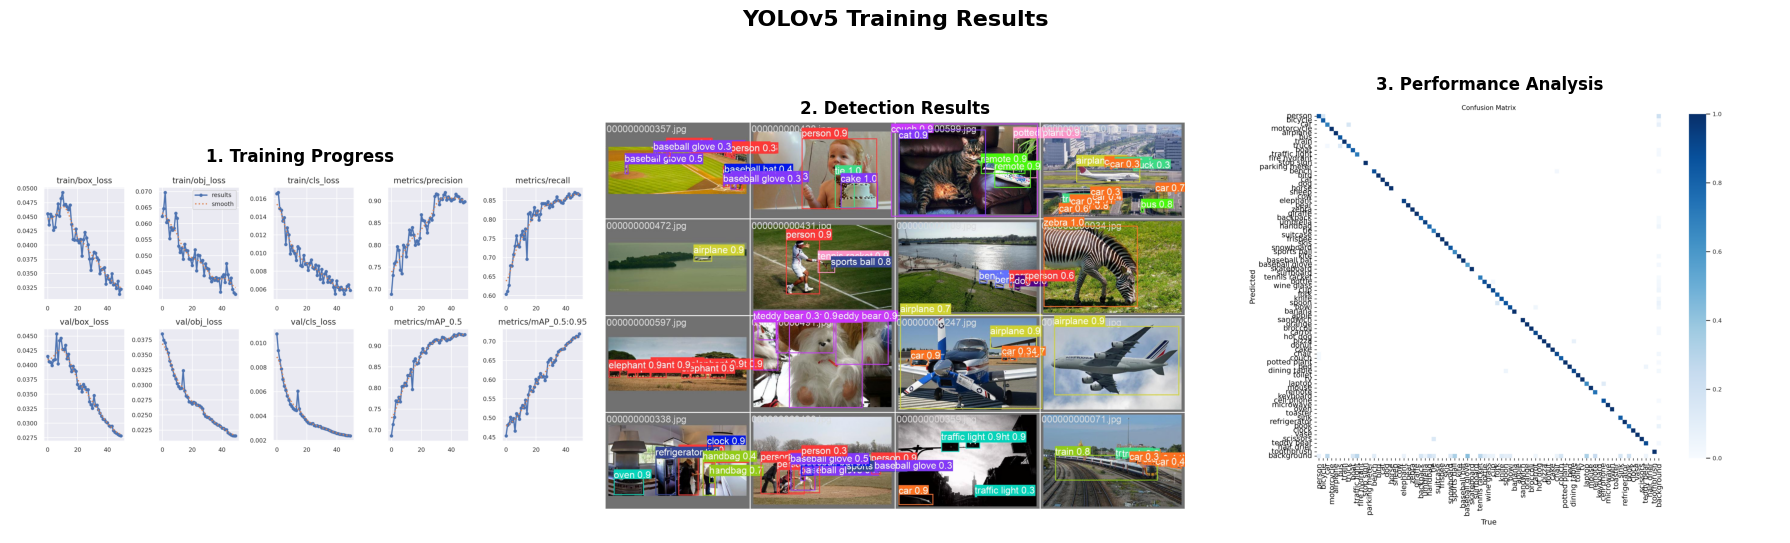

In [13]:
# +) 학습 결과 일부 출력

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

print("YOLOv5 학습 결과")
print("="*50)

base_path = "/content/yolov5/runs/train/my_yolo_exp3/"

images = [
    (base_path + "results.png", "Training Progress"),
    (base_path + "val_batch0_pred.jpg", "Detection Results"),
    (base_path + "confusion_matrix.png", "Performance Analysis")
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('YOLOv5 Training Results', fontsize=16, fontweight='bold')

for i, (img_path, title) in enumerate(images):
    try:
        if Path(img_path).exists():
            img = mpimg.imread(img_path)
            axes[i].imshow(img)
            axes[i].set_title(f"{i+1}. {title}", fontsize=12, fontweight='bold')
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, f'File not found:\n{Path(img_path).name}',
                        ha='center', va='center', fontsize=10)
            axes[i].set_title(f"{i+1}. {title}", fontsize=12)
            axes[i].axis('off')
    except Exception as e:
        axes[i].text(0.5, 0.5, f'Error:\n{str(e)}', ha='center', va='center', fontsize=8)
        axes[i].set_title(f"{i+1}. {title}", fontsize=12)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

In [7]:
# 4. 추론

%cd /content/yolov5
!python detect.py --weights runs/train/my_yolo_exp/weights/best.pt --img 640 --source coco128/images/train2017

/content/yolov5
detect: weights=['runs/train/my_yolo_exp3/weights/best.pt'], source=coco128/images/train2017, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/128 /content/yolov5/coco128/images/train2017/000000000009.jpg: 480x640 1 fork, 3 bowls, 4 oranges, 1 broccoli, 414.7ms
image 2/128 /content/yolov5/coco128/images/train2017/000000000025.jpg: 448x640 2 giraffes, 296.2ms
image 3/128 /content/yolov5/coco128/images/train2017/000000000030.jpg: 448x640 1 p

YOLOv5 추론 결과

📷 Detection Result 1:


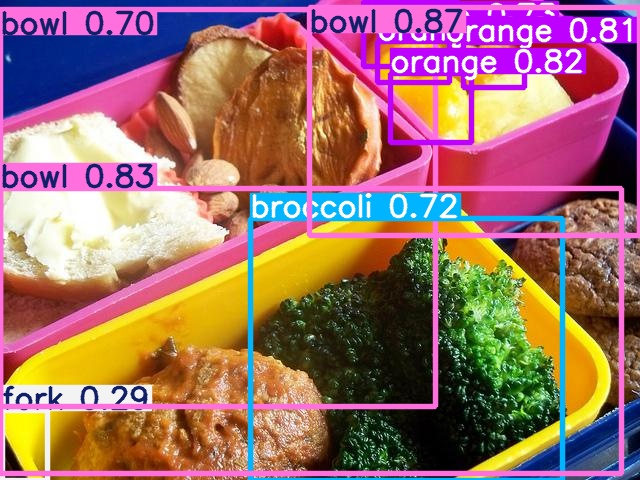


📷 Detection Result 2:


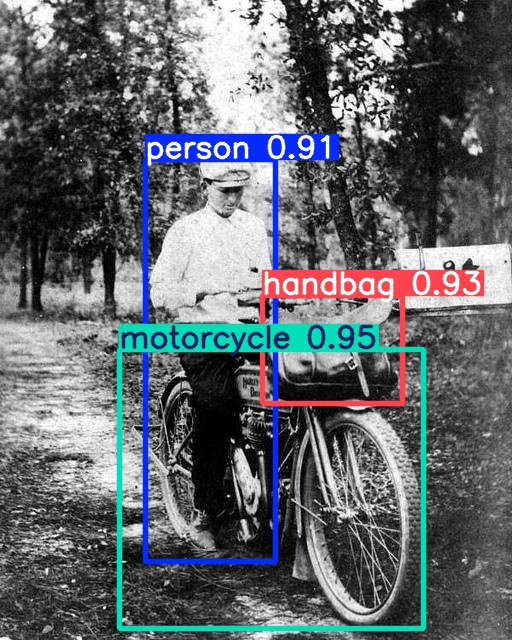


📷 Detection Result 3:


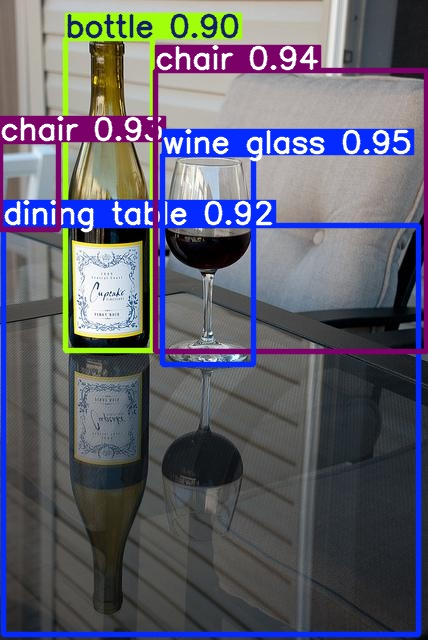

In [9]:
# +) 추론 결과 일부 출력

from IPython.display import Image, display, HTML

print("YOLOv5 추론 결과")
print("="*50)

print("\n📷 Detection Result 1:")
display(Image('/content/yolov5/runs/detect/exp/000000000009.jpg'))

print("\n📷 Detection Result 2:")
display(Image('/content/yolov5/runs/detect/exp/000000000086.jpg'))

print("\n📷 Detection Result 3:")
display(Image('/content/yolov5/runs/detect/exp/000000000283.jpg'))

In [ ]:
# +) 결과 zip으로 압축 후 다운로드

!zip -r /content/my_yolo_exp.zip /content/yolov5/runs/train/my_yolo_exp

from google.colab import files
files.download('/content/my_yolo_exp.zip')

  adding: content/yolov5/runs/train/my_yolo_exp3/ (stored 0%)
  adding: content/yolov5/runs/train/my_yolo_exp3/results.png (deflated 7%)
  adding: content/yolov5/runs/train/my_yolo_exp3/val_batch2_pred.jpg (deflated 10%)
  adding: content/yolov5/runs/train/my_yolo_exp3/confusion_matrix.png (deflated 17%)
  adding: content/yolov5/runs/train/my_yolo_exp3/train_batch2.jpg (deflated 2%)
  adding: content/yolov5/runs/train/my_yolo_exp3/events.out.tfevents.1750367627.3307747710f7.3908.0 (deflated 17%)
  adding: content/yolov5/runs/train/my_yolo_exp3/P_curve.png (deflated 10%)
  adding: content/yolov5/runs/train/my_yolo_exp3/weights/ (stored 0%)
  adding: content/yolov5/runs/train/my_yolo_exp3/weights/best.pt (deflated 9%)
  adding: content/yolov5/runs/train/my_yolo_exp3/weights/last.pt (deflated 9%)
  adding: content/yolov5/runs/train/my_yolo_exp3/val_batch1_labels.jpg (deflated 6%)
  adding: content/yolov5/runs/train/my_yolo_exp3/labels.jpg (deflated 23%)
  adding: content/yolov5/runs/train

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>